In [1]:
import sys
import stlearn as st
st.settings.set_figure_params(dpi=300)
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
file = Path("../stimage").resolve()
parent= file.parent
sys.path.append(str(parent))
from PIL import Image
from stimage._utils import gene_plot, Read10X, ReadOldST, tiling, ensembl_to_id
from stimage._model import CNN_NB_multiple_genes, negative_binomial_layer, negative_binomial_loss
from stimage._data_generator import DataGenerator
import tensorflow as tf
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
# import geopandas as gpd
from sklearn.neighbors import KDTree
from anndata import read_h5ad
from tensorflow.keras import backend as K
import scanpy as sc
import pickle

In [2]:
import matplotlib.pyplot as plt
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import pandas as pd
import geopandas as gpd
import os
import splot
from splot.esda import moran_scatterplot, lisa_cluster
from esda.moran import Moran, Moran_Local
from esda.moran import Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation

In [3]:
from scipy import stats

def plot_correlation(df, attr_1, attr_2):
    r = stats.pearsonr(df[attr_1], 
                       df[attr_2])[0] **2

    g = sns.lmplot(data=df,
        x=attr_1, y=attr_2,
        height=5, legend=True
    )
    # g.set(ylim=(0, 360), xlim=(0,360))

    g.set_axis_labels(attr_1, attr_2)
    plt.annotate(r'$R^2:{0:.2f}$'.format(r),
                (max(df[attr_1])*0.9, max(df[attr_2])*0.9))
    return g


def calculate_correlation(attr_1, attr_2):
    r = stats.pearsonr(attr_1, 
                       attr_2)[0]
    return r

def calculate_correlation_2(attr_1, attr_2):
    r = stats.spearmanr(attr_1, 
                       attr_2)[0]
    return r

In [4]:
DATA_PATH = Path("/clusterdata/uqxtan9/Xiao/STimage/"
                "dataset/breast_cancer_oldST_STNet")

In [41]:
DATA_PATH = Path("/clusterdata/uqxtan9/Q1851/Xiao/Working_project/her2st")

In [42]:
adata_all = read_h5ad(DATA_PATH / "all_adata.h5ad")

In [17]:
adata_all = ensembl_to_id(adata_all)

In [45]:
samples = adata_all.obs["library_id"].unique().tolist()

In [47]:
# gene_list = adata_all.var_names
# for sample in samples:
#     ad_s = adata_all[adata_all.obs["library_id"] == sample]
#     sc.pp.scale(ad_s)
#     sc.pp.highly_variable_genes(ad_s, n_top_genes=1000)
#     ge = ad_s.var_names[ad_s.var.highly_variable]
#     gene_list = gene_list.intersection(ge)
#     print(len(gene_list))

In [56]:
sc.pp.highly_variable_genes(adata_all, n_top_genes=1000)
adata_all.var["n_expression"] = adata_all.to_df().sum(axis=0)
gene_list = adata_all.var_names[adata_all.var.highly_variable & (adata_all.var["n_expression"] > 1000)]

In [59]:
gene_list

Index(['ISG15', 'PLA2G2D', 'CAMK2N1', 'USP48', 'TCEA3', 'PNRC2', 'LDLRAP1',
       'IFI6', 'ZBTB8OS', 'RBBP4',
       ...
       'PTGDS', 'WWC3', 'OFD1', 'SMS', 'CYBB', 'LINC01420', 'ITM2A', 'SH3BGRL',
       'BEX3', 'PHF6'],
      dtype='object', length=769)

In [60]:
gene_list_path = "/clusterdata/uqxtan9/Q1851/Xiao/Working_project/STimage/development/stimage_compare_histogene_1000hvg/gene_list.pkl"

In [66]:
gene_list.to_list()

['ISG15',
 'PLA2G2D',
 'CAMK2N1',
 'USP48',
 'TCEA3',
 'PNRC2',
 'LDLRAP1',
 'IFI6',
 'ZBTB8OS',
 'RBBP4',
 'PSMB2',
 'GNL2',
 'SF3A3',
 'UTP11',
 'AKIRIN1',
 'MFSD2A',
 'CAP1',
 'CTPS1',
 'PPCS',
 'PPIH',
 'YBX1',
 'EBNA1BP2',
 'CDC20',
 'PTPRF',
 'KDM4A',
 'EIF2B3',
 'NASP',
 'GPBP1L1',
 'TSPAN1',
 'RAD54L',
 'LRRC41',
 'UQCRH',
 'CMPK1',
 'RNF11',
 'TTC39A',
 'TXNDC12',
 'PRPF38A',
 'SCP2',
 'C1orf123',
 'MAGOH',
 'NDC1',
 'HSPB11',
 'TMEM59',
 'SSBP3',
 'TACSTD2',
 'MYSM1',
 'TM2D1',
 'PATJ',
 'USP1',
 'JAK1',
 'LEPROT',
 'GNG12',
 'SRSF11',
 'USP33',
 'IFI44L',
 'IFI44',
 'GNG5',
 'SEP15',
 'LMO4',
 'GTF2B',
 'GBP3',
 'GBP1',
 'GBP2',
 'GBP5',
 'LRRC8B',
 'LRRC8D',
 'CDC7',
 'GLMN',
 'MTF2',
 'TMED5',
 'CCDC18',
 'DR1',
 'FNBP1L',
 'BCAR3',
 'DNTTIP2',
 'GCLM',
 'ARHGAP29',
 'ABCD3',
 'CNN3',
 'ALG14',
 'TMEM56',
 'SNX7',
 'VCAM1',
 'PSMA5',
 'GSTM3',
 'CD53',
 'ATP5F1',
 'WDR3',
 'PHGDH',
 'CTSS',
 'CTSK',
 'SCNM1',
 'S100A8',
 'S100A14',
 'S100A1',
 'CREB3L4',
 'CKS1B',
 'EFNA3'

In [67]:
with open(gene_list_path, 'wb') as f:
    pickle.dump(gene_list.to_list(), f)

In [70]:
with open(gene_list_path, 'rb') as f:
    gene_list = pickle.load(f)

In [71]:
gene_list

['ISG15',
 'PLA2G2D',
 'CAMK2N1',
 'USP48',
 'TCEA3',
 'PNRC2',
 'LDLRAP1',
 'IFI6',
 'ZBTB8OS',
 'RBBP4',
 'PSMB2',
 'GNL2',
 'SF3A3',
 'UTP11',
 'AKIRIN1',
 'MFSD2A',
 'CAP1',
 'CTPS1',
 'PPCS',
 'PPIH',
 'YBX1',
 'EBNA1BP2',
 'CDC20',
 'PTPRF',
 'KDM4A',
 'EIF2B3',
 'NASP',
 'GPBP1L1',
 'TSPAN1',
 'RAD54L',
 'LRRC41',
 'UQCRH',
 'CMPK1',
 'RNF11',
 'TTC39A',
 'TXNDC12',
 'PRPF38A',
 'SCP2',
 'C1orf123',
 'MAGOH',
 'NDC1',
 'HSPB11',
 'TMEM59',
 'SSBP3',
 'TACSTD2',
 'MYSM1',
 'TM2D1',
 'PATJ',
 'USP1',
 'JAK1',
 'LEPROT',
 'GNG12',
 'SRSF11',
 'USP33',
 'IFI44L',
 'IFI44',
 'GNG5',
 'SEP15',
 'LMO4',
 'GTF2B',
 'GBP3',
 'GBP1',
 'GBP2',
 'GBP5',
 'LRRC8B',
 'LRRC8D',
 'CDC7',
 'GLMN',
 'MTF2',
 'TMED5',
 'CCDC18',
 'DR1',
 'FNBP1L',
 'BCAR3',
 'DNTTIP2',
 'GCLM',
 'ARHGAP29',
 'ABCD3',
 'CNN3',
 'ALG14',
 'TMEM56',
 'SNX7',
 'VCAM1',
 'PSMA5',
 'GSTM3',
 'CD53',
 'ATP5F1',
 'WDR3',
 'PHGDH',
 'CTSS',
 'CTSK',
 'SCNM1',
 'S100A8',
 'S100A14',
 'S100A1',
 'CREB3L4',
 'CKS1B',
 'EFNA3'

In [22]:
gene_list=["COX6C","TTLL12", "PABPC1", "GNAS", "HSP90AB1", 
           "TFF3", "ATP1A1", "B2M", "FASN", "SPARC", "CD74", "CD63", "CD24", "CD81"]

In [23]:
gene_list

['COX6C',
 'TTLL12',
 'PABPC1',
 'GNAS',
 'HSP90AB1',
 'TFF3',
 'ATP1A1',
 'B2M',
 'FASN',
 'SPARC',
 'CD74',
 'CD63',
 'CD24',
 'CD81']

In [24]:
test_sample = samples[0]
n_genes = len(gene_list)

adata_all_train_valid = adata_all[adata_all.obs["library_id"].isin(
    adata_all.obs.library_id.cat.remove_categories(test_sample).unique())]

training_index = adata_all_train_valid.obs.sample(frac=0.7, random_state=1).index
training_dataset = adata_all_train_valid[training_index,].copy()

valid_index = adata_all_train_valid.obs.index.isin(training_index)
valid_dataset = adata_all_train_valid[~valid_index,].copy()

test_index = adata_all.obs.library_id == test_sample
test_dataset_1 = adata_all[test_index,].copy()

In [25]:
train_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=training_dataset, 
                          genes=gene_list, aug=False),
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
train_gen_ = train_gen.shuffle(buffer_size=500).batch(32).repeat(1).cache().prefetch(tf.data.experimental.AUTOTUNE)
valid_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=valid_dataset, 
                          genes=gene_list), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
valid_gen_ = valid_gen.shuffle(buffer_size=500).batch(32).repeat(1).cache().prefetch(tf.data.experimental.AUTOTUNE)
test_gen_1 = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=test_dataset_1, 
                          genes=gene_list), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
)
test_gen__1 = test_gen_1.batch(1)

In [26]:
K.clear_session()
model = CNN_NB_multiple_genes((299, 299, 3), n_genes)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,
                                            restore_best_weights=False)

In [27]:
train_history = model.fit(train_gen_,
                          epochs=10,
                          validation_data=valid_gen_,
                          callbacks=[callback]
                          )

Epoch 1/10
611/611 [==============================] - 889s 1s/step - loss: 25.3033 - gene_0_loss: 1.8401 - gene_1_loss: 0.9511 - gene_2_loss: 1.8556 - gene_3_loss: 2.2946 - gene_4_loss: 1.9848 - gene_5_loss: 1.6065 - gene_6_loss: 1.8604 - gene_7_loss: 1.9834 - gene_8_loss: 2.4701 - gene_9_loss: 1.3669 - gene_10_loss: 1.7143 - gene_11_loss: 2.4787 - gene_12_loss: 1.2042 - gene_13_loss: 1.6926 - val_loss: 20.4397 - val_gene_0_loss: 1.5807 - val_gene_1_loss: 0.8777 - val_gene_2_loss: 1.5964 - val_gene_3_loss: 1.4798 - val_gene_4_loss: 1.4489 - val_gene_5_loss: 1.5454 - val_gene_6_loss: 1.3455 - val_gene_7_loss: 1.6749 - val_gene_8_loss: 1.7583 - val_gene_9_loss: 1.2771 - val_gene_10_loss: 1.5931 - val_gene_11_loss: 1.5906 - val_gene_12_loss: 1.1219 - val_gene_13_loss: 1.5493
Epoch 2/10
611/611 [==============================] - 64s 104ms/step - loss: 20.0709 - gene_0_loss: 1.5717 - gene_1_loss: 0.8475 - gene_2_loss: 1.5632 - gene_3_loss: 1.4448 - gene_4_loss: 1.4185 - gene_5_loss: 1.5401 

In [28]:
test_predictions = model.predict(test_gen__1)
from scipy.stats import nbinom
y_preds = []
for i in range(n_genes):
    n = test_predictions[i][:, 0]
    p = test_predictions[i][:, 1]
    y_pred = nbinom.mean(n, p)
    y_preds.append(y_pred)
test_dataset_1.obsm["predicted_gene"] = np.array(y_preds).transpose()

In [29]:
test_dataset_1_ = test_dataset_1[:,gene_list].copy()
test_dataset_1_.X = test_dataset_1_.obsm["predicted_gene"]

In [30]:
pred_adata = test_dataset_1_
test_dataset = test_dataset_1
df = pd.DataFrame()

for gene in pred_adata.var_names:
    cor_val = calculate_correlation(pred_adata.to_df().loc[:,gene], test_dataset.to_df().loc[:,gene])
    df = df.append(pd.Series([gene, cor_val, test_sample, "STimage"], 
                             index=["Gene", "Pearson correlation", "Slide", "Method"]),
                  ignore_index=True)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input as preprocess_resnet
from tensorflow.keras.preprocessing import image
from stimage._imgaug import seq_aug
from sklearn.neighbors import KDTree


class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'

    def __init__(self, adata, dim=(299, 299), n_channels=3, genes=None, aug=False, tile_path="tile_path"):
        'Initialization'
        self.dim = dim
        self.adata = adata
        self.n_channels = n_channels
        self.genes = genes
        self.num_genes = len(genes)
        self.aug = aug
        self.tile_path = tile_path
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(self.adata.n_obs)

    def __getitem__(self, index):
        'Generate one batch of data'
        # Find list of IDs
        obs_temp = self.adata.obs_names[index]

        # Generate data
        X_img = self._load_img(obs_temp)
        y = self._load_label(obs_temp)

        return X_img, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.adata.n_obs)

    def _load_img(self, obs):
        img_path = self.adata.obs.loc[obs, 'tile_path']
        X_img = image.load_img(img_path, target_size=self.dim)
        X_img = image.img_to_array(X_img).astype('uint8')
        #         X_img = np.expand_dims(X_img, axis=0)
        #         n_rotate = np.random.randint(0, 4)
        #         X_img = np.rot90(X_img, k=n_rotate, axes=(1, 2))
        if self.aug:
            X_img = seq_aug(image=X_img)
#         X_img = preprocess_resnet(X_img)
        return X_img

    def _load_label(self, obs):
        batch_adata = self.adata[obs, self.genes].copy()

        return tuple([batch_adata.to_df()[i].values for i in self.genes])

    def get_classes(self):
        return self.adata.to_df().loc[:, self.genes]


class DataGenerator_LSTM_one_output(keras.utils.Sequence):
    'Generates data for Keras'

    def __init__(self, adata, dim=(299, 299), n_channels=3, genes=None, aug=False):
        'Initialization'
        self.dim = dim
        self.adata = adata
        self.n_channels = n_channels
        self.genes = genes
        self.num_genes = len(genes)
        self.aug = aug
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(self.adata.n_obs)

    def __getitem__(self, index):
        'Generate one batch of data'
        # Find list of IDs
        obs_temp = self.adata.obs_names[index]

        # Generate data
        X_img = self._load_img(obs_temp)
        y = self._load_label(obs_temp)
        
        # Generate neighbour data
        candidates = self.adata.obs[['imagecol', 'imagerow']]
        quary_spots = np.array(candidates.loc[obs_temp,:]).reshape(1, -1)
        nearest_index = self.get_nearest_index(quary_spots, candidates, k_nn=7, leaf_size=self.adata.n_obs//2)
        np.random.shuffle(nearest_index.flat)
        obs_temp_neighbour = self.adata.obs_names[nearest_index.ravel()]
        
        X_img_neighbour = np.stack([self._load_img(x) for x in obs_temp_neighbour], axis=0)
        X_img = np.expand_dims(X_img, axis=0)
        X_img_final = np.concatenate([X_img_neighbour, X_img], axis=0)

        return X_img_final, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(self.adata.n_obs)

    def _load_img(self, obs):
        img_path = self.adata.obs.loc[obs, 'tile_path']
        X_img = image.load_img(img_path, target_size=self.dim)
        X_img = image.img_to_array(X_img).astype('uint8')
        #         X_img = np.expand_dims(X_img, axis=0)
        #         n_rotate = np.random.randint(0, 4)
        #         X_img = np.rot90(X_img, k=n_rotate, axes=(1, 2))
        if self.aug:
            X_img = seq_aug(image=X_img)
#         X_img = preprocess_resnet(X_img)
#         X_img = np.expand_dims(X_img, axis=0)
        return X_img

    def _load_label(self, obs):
        batch_adata = self.adata[obs, self.genes].copy()

        return tuple([batch_adata.to_df()[i].values for i in self.genes])

    def get_classes(self):
        return self.adata.to_df().loc[:, self.genes]
    
    def get_nearest_index(self, quary_spots, candidates, k_nn, leaf_size):
        tree = KDTree(candidates, leaf_size=leaf_size)
        _, indices = tree.query(quary_spots, k=k_nn)
        return indices.ravel()[1:]

In [33]:
df = pd.DataFrame()
for i in samples:
    test_sample = i
    n_genes = len(gene_list)

    adata_all_train_valid = adata_all[adata_all.obs["library_id"].isin(
        adata_all.obs.library_id.cat.remove_categories(test_sample).unique())]

    training_index = adata_all_train_valid.obs.sample(frac=0.7, random_state=1).index
    training_dataset = adata_all_train_valid[training_index,].copy()

    valid_index = adata_all_train_valid.obs.index.isin(training_index)
    valid_dataset = adata_all_train_valid[~valid_index,].copy()
    
    test_index = adata_all.obs.library_id == test_sample
    test_dataset_1 = adata_all[test_index,].copy()
    
    
    train_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=training_dataset, 
                          genes=gene_list, aug=False),
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
    )
    train_gen_ = train_gen.shuffle(buffer_size=500).batch(32).repeat(1).cache().prefetch(tf.data.experimental.AUTOTUNE)
    valid_gen = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=valid_dataset, 
                          genes=gene_list), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
    )
    valid_gen_ = valid_gen.shuffle(buffer_size=500).batch(32).repeat(1).cache().prefetch(tf.data.experimental.AUTOTUNE)
    test_gen_1 = tf.data.Dataset.from_generator(
            lambda:DataGenerator(adata=test_dataset_1, 
                          genes=gene_list), 
            output_types=(tf.float32, tuple([tf.float32]*n_genes)), 
            output_shapes=([299,299,3], tuple([1]*n_genes))
    )
    test_gen__1 = test_gen_1.batch(1)
    
    K.clear_session()
    model = CNN_NB_multiple_genes((299, 299, 3), n_genes)
    callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20,
                                            restore_best_weights=False)
    
    train_history = model.fit(train_gen_,
                          epochs=100,
                          validation_data=valid_gen_,
                          callbacks=[callback]
                          )
    
    test_predictions = model.predict(test_gen__1)
    from scipy.stats import nbinom
    y_preds = []
    for i in range(n_genes):
        n = test_predictions[i][:, 0]
        p = test_predictions[i][:, 1]
        y_pred = nbinom.mean(n, p)
        y_preds.append(y_pred)
    test_dataset_1.obsm["predicted_gene"] = np.array(y_preds).transpose()
    
    test_dataset_1_ = test_dataset_1[:,gene_list].copy()
    test_dataset_1_.X = test_dataset_1_.obsm["predicted_gene"]
    
    pred_adata = test_dataset_1_
    test_dataset = test_dataset_1

    for gene in pred_adata.var_names:
        cor_val = calculate_correlation(pred_adata.to_df().loc[:,gene], test_dataset.to_df().loc[:,gene])
        df = df.append(pd.Series([gene, cor_val, test_sample, "STimage"], 
                             index=["Gene", "Pearson correlation", "Slide", "Method"]),
                      ignore_index=True)

Epoch 1/100
611/611 [==============================] - 706s 1s/step - loss: 26.3558 - gene_0_loss: 1.8919 - gene_1_loss: 0.9030 - gene_2_loss: 2.1134 - gene_3_loss: 1.5685 - gene_4_loss: 1.9629 - gene_5_loss: 1.6117 - gene_6_loss: 1.8885 - gene_7_loss: 1.9810 - gene_8_loss: 2.2769 - gene_9_loss: 1.3696 - gene_10_loss: 3.3645 - gene_11_loss: 1.7961 - gene_12_loss: 1.5190 - gene_13_loss: 2.1088 - val_loss: 21.0538 - val_gene_0_loss: 1.5865 - val_gene_1_loss: 0.8595 - val_gene_2_loss: 1.7024 - val_gene_3_loss: 1.4301 - val_gene_4_loss: 1.4816 - val_gene_5_loss: 1.5189 - val_gene_6_loss: 1.4630 - val_gene_7_loss: 1.6840 - val_gene_8_loss: 1.7205 - val_gene_9_loss: 1.2654 - val_gene_10_loss: 1.8540 - val_gene_11_loss: 1.5335 - val_gene_12_loss: 1.2447 - val_gene_13_loss: 1.7097
Epoch 2/100
611/611 [==============================] - 64s 104ms/step - loss: 20.5482 - gene_0_loss: 1.5651 - gene_1_loss: 0.8275 - gene_2_loss: 1.6363 - gene_3_loss: 1.3953 - gene_4_loss: 1.4569 - gene_5_loss: 1.521

611/611 [==============================] - 63s 104ms/step - loss: 17.2286 - gene_0_loss: 1.3336 - gene_1_loss: 0.7417 - gene_2_loss: 1.3475 - gene_3_loss: 1.2218 - gene_4_loss: 1.2137 - gene_5_loss: 1.3652 - gene_6_loss: 1.1786 - gene_7_loss: 1.3686 - gene_8_loss: 1.3591 - gene_9_loss: 1.1233 - gene_10_loss: 1.3471 - gene_11_loss: 1.2976 - gene_12_loss: 0.9849 - gene_13_loss: 1.3460 - val_loss: 17.3026 - val_gene_0_loss: 1.3217 - val_gene_1_loss: 0.7637 - val_gene_2_loss: 1.3556 - val_gene_3_loss: 1.2327 - val_gene_4_loss: 1.2164 - val_gene_5_loss: 1.3489 - val_gene_6_loss: 1.1907 - val_gene_7_loss: 1.3761 - val_gene_8_loss: 1.3612 - val_gene_9_loss: 1.1279 - val_gene_10_loss: 1.3559 - val_gene_11_loss: 1.2968 - val_gene_12_loss: 1.0079 - val_gene_13_loss: 1.3472
Epoch 22/100
611/611 [==============================] - 63s 103ms/step - loss: 17.2035 - gene_0_loss: 1.3314 - gene_1_loss: 0.7407 - gene_2_loss: 1.3456 - gene_3_loss: 1.2203 - gene_4_loss: 1.2121 - gene_5_loss: 1.3627 - gene_

611/611 [==============================] - 62s 102ms/step - loss: 16.9125 - gene_0_loss: 1.3048 - gene_1_loss: 0.7294 - gene_2_loss: 1.3238 - gene_3_loss: 1.2032 - gene_4_loss: 1.1944 - gene_5_loss: 1.3292 - gene_6_loss: 1.1600 - gene_7_loss: 1.3426 - gene_8_loss: 1.3298 - gene_9_loss: 1.1061 - gene_10_loss: 1.3204 - gene_11_loss: 1.2786 - gene_12_loss: 0.9654 - gene_13_loss: 1.3247 - val_loss: 17.0165 - val_gene_0_loss: 1.2954 - val_gene_1_loss: 0.7528 - val_gene_2_loss: 1.3325 - val_gene_3_loss: 1.2161 - val_gene_4_loss: 1.2007 - val_gene_5_loss: 1.3147 - val_gene_6_loss: 1.1738 - val_gene_7_loss: 1.3517 - val_gene_8_loss: 1.3335 - val_gene_9_loss: 1.1137 - val_gene_10_loss: 1.3328 - val_gene_11_loss: 1.2803 - val_gene_12_loss: 0.9909 - val_gene_13_loss: 1.3278
Epoch 42/100
611/611 [==============================] - 62s 102ms/step - loss: 16.9026 - gene_0_loss: 1.3039 - gene_1_loss: 0.7290 - gene_2_loss: 1.3230 - gene_3_loss: 1.2027 - gene_4_loss: 1.1938 - gene_5_loss: 1.3279 - gene_

KeyboardInterrupt: 

In [ ]:
df.to_csv("./stimage_compare_histogene.csv")

In [4]:
BASE_PATH = Path("/clusterdata/uqxtan9/Xiao/STimage/development/stimage_compare_histogene")

In [5]:
df = pd.DataFrame()

In [6]:
for method in ["histogene", "stimage", "stnet", "ViT_NB"]:
    for f in BASE_PATH.glob("./{}*.csv".format(method)):
        df_ = pd.read_csv(f, index_col=0)
        df = df.append(df_, ignore_index=True)

In [7]:
df["Method"].unique()

array(['His2gene', 'STimage_her2st', 'STnet', 'ViT_NB'], dtype=object)

In [8]:
df["Method"] = df["Method"].replace("STimage_her2st", "STimage")

In [9]:
df = df.sort_values(["Slide", "Pearson correlation"])

In [70]:
df_ = pd.read_csv(BASE_PATH / "A1_corr.csv", index_col=0)

In [72]:
df_

,A1,A2,A3,A4,A5,A6,B1,B2,B3,B4,...,E3,F1,F2,F3,G1,G2,G3,H1,H2,H3
CD63,0.176188,-0.003588,0.124122,-0.003597,0.018383,-0.042674,0.493319,0.678048,0.481406,0.643202,...,0.075085,0.104537,0.142151,0.126880,0.245606,0.315763,0.255224,0.254071,0.391112,0.281390
TFF3,0.158231,0.341191,0.202691,0.223735,0.071706,0.064899,0.358425,0.643688,0.511685,0.590033,...,0.059733,0.051615,-0.014246,-0.017025,-0.063522,0.130165,-0.008900,-0.053273,-0.008253,-0.101449
CD74,0.246861,0.233024,0.246145,0.191732,0.275319,0.063163,0.657175,0.725637,0.607406,0.744538,...,0.104743,0.143813,0.208757,0.075858,0.254742,0.339624,0.217227,0.359969,0.347182,0.256717
PABPC1,0.237050,0.011800,0.124695,-0.002852,0.315074,0.164338,0.547639,0.696023,0.625417,0.645280,...,-0.073027,-0.011878,-0.040272,0.009580,0.359851,0.452076,0.380821,0.378875,0.473888,0.480092
TTLL12,-0.072916,-0.030813,0.070277,0.083950,0.124160,0.126856,0.434843,0.558869,0.341015,0.489609,...,0.029042,0.043757,-0.021244,-0.051045,0.025052,0.213697,0.115857,0.096876,0.051714,-0.003941
B2M,0.138941,0.256675,0.115362,0.177822,0.173292,0.082614,0.768579,0.828877,0.802865,0.821283,...,0.129049,0.152554,0.047149,0.130588,0.557076,0.488073,0.536956,0.439073,0.570891,0.566371
ATP1A1,0.180126,0.036043,0.106726,-0.048043,0.247191,0.082665,0.755069,0.718987,0.707567,0.718138,...,0.131825,0.019578,0.018828,0.000661,0.480289,0.490559,0.418505,0.374375,0.414891,0.351181
CD81,0.161079,0.114243,0.128534,0.113969,0.159751,-0.032983,0.472664,0.676752,0.585656,0.657994,...,0.142232,-0.040266,-0.015213,-0.001580,0.259853,0.301487,0.306387,0.268963,0.369941,0.341854
SPARC,0.268317,0.167488,0.119371,0.257675,0.250147,0.143878,0.645560,0.571735,0.615041,0.647048,...,0.195673,0.072374,0.060732,0.060189,0.439260,0.416659,0.360452,0.245885,0.271603,0.308134
COX6C,0.180686,0.139789,0.230161,0.259750,0.267087,0.156687,0.683263,0.818783,0.755195,0.800152,...,0.069952,0.017646,0.081661,0.014361,0.272750,0.476861,0.348686,0.099597,0.080595,0.121013


In [73]:
df_["genes"] = df_.index

In [77]:
df_o = pd.melt(df_, id_vars=["genes"])

In [80]:
df_o["Method"] = "onkar"

In [82]:
df_o.columns = ["Gene", "Slide", "Pearson correlation", "Method"]

In [84]:
df_o

,Gene,Slide,Pearson correlation,Method
0,CD63,A1,0.176188,onkar
1,TFF3,A1,0.158231,onkar
2,CD74,A1,0.246861,onkar
3,PABPC1,A1,0.237050,onkar
4,TTLL12,A1,-0.072916,onkar
...,...,...,...,...
499,COX6C,H3,0.121013,onkar
500,GNAS,H3,0.417555,onkar
501,CD24,H3,0.521404,onkar
502,HSP90AB1,H3,0.361532,onkar


In [85]:
df = df.append(df_o, ignore_index=True)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("white")
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])


class GridShader():
    def __init__(self, ax, first=True, **kwargs):
        self.spans = []
        self.sf = first
        self.ax = ax
        self.kw = kwargs
        self.ax.autoscale(False, axis="x")
        self.cid = self.ax.callbacks.connect('xlim_changed', self.shade)
        self.shade()
    def clear(self):
        for span in self.spans:
            try:
                span.remove()
            except:
                pass
    def shade(self, evt=None):
        self.clear()
        xticks = self.ax.get_xticks()
        xlim = self.ax.get_xlim()
        xticks = xticks[(xticks > xlim[0]) & (xticks < xlim[-1])]
        locs = np.concatenate(([[xlim[0]], xticks+0.5, [xlim[-1]]]))

        start = locs[1-int(self.sf)::2]
        end = locs[2-int(self.sf)::2]

        for s, e in zip(start, end):
            self.spans.append(self.ax.axvspan(s, e, zorder=0, **self.kw))


<ipython-input-10-3d3a00831222>:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


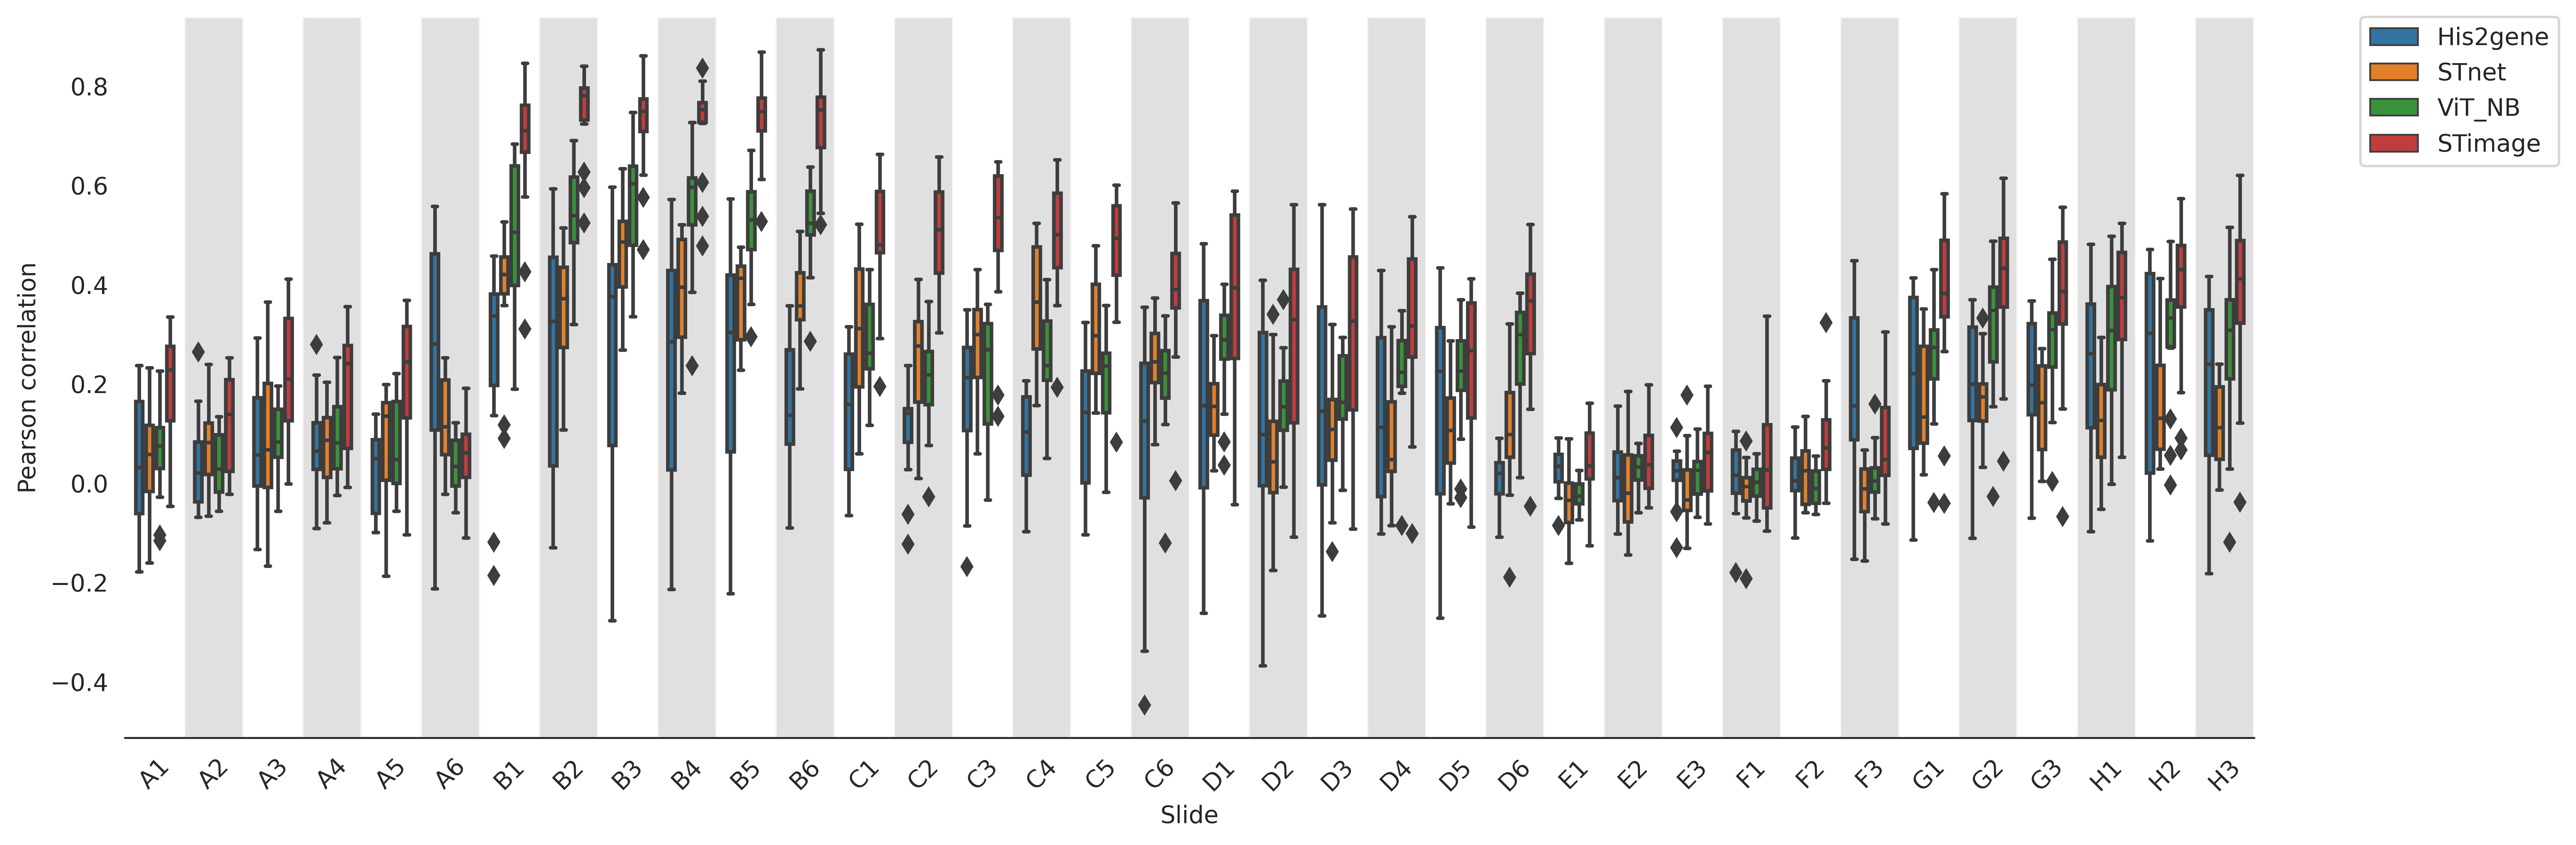

In [11]:
fig = plt.figure(figsize=(15, 5))
a = sns.boxplot(x="Slide", y="Pearson correlation", hue="Method",

               width=0.7,
               data=df)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
sns.despine(left=True)
a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
adjust_box_widths(fig, 0.7)
plt.autoscale()
gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./compare_STimage_her2gene_stnet_stnetdata_bySample.png", dpi=300)
plt.show()

<ipython-input-10-3d3a00831222>:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


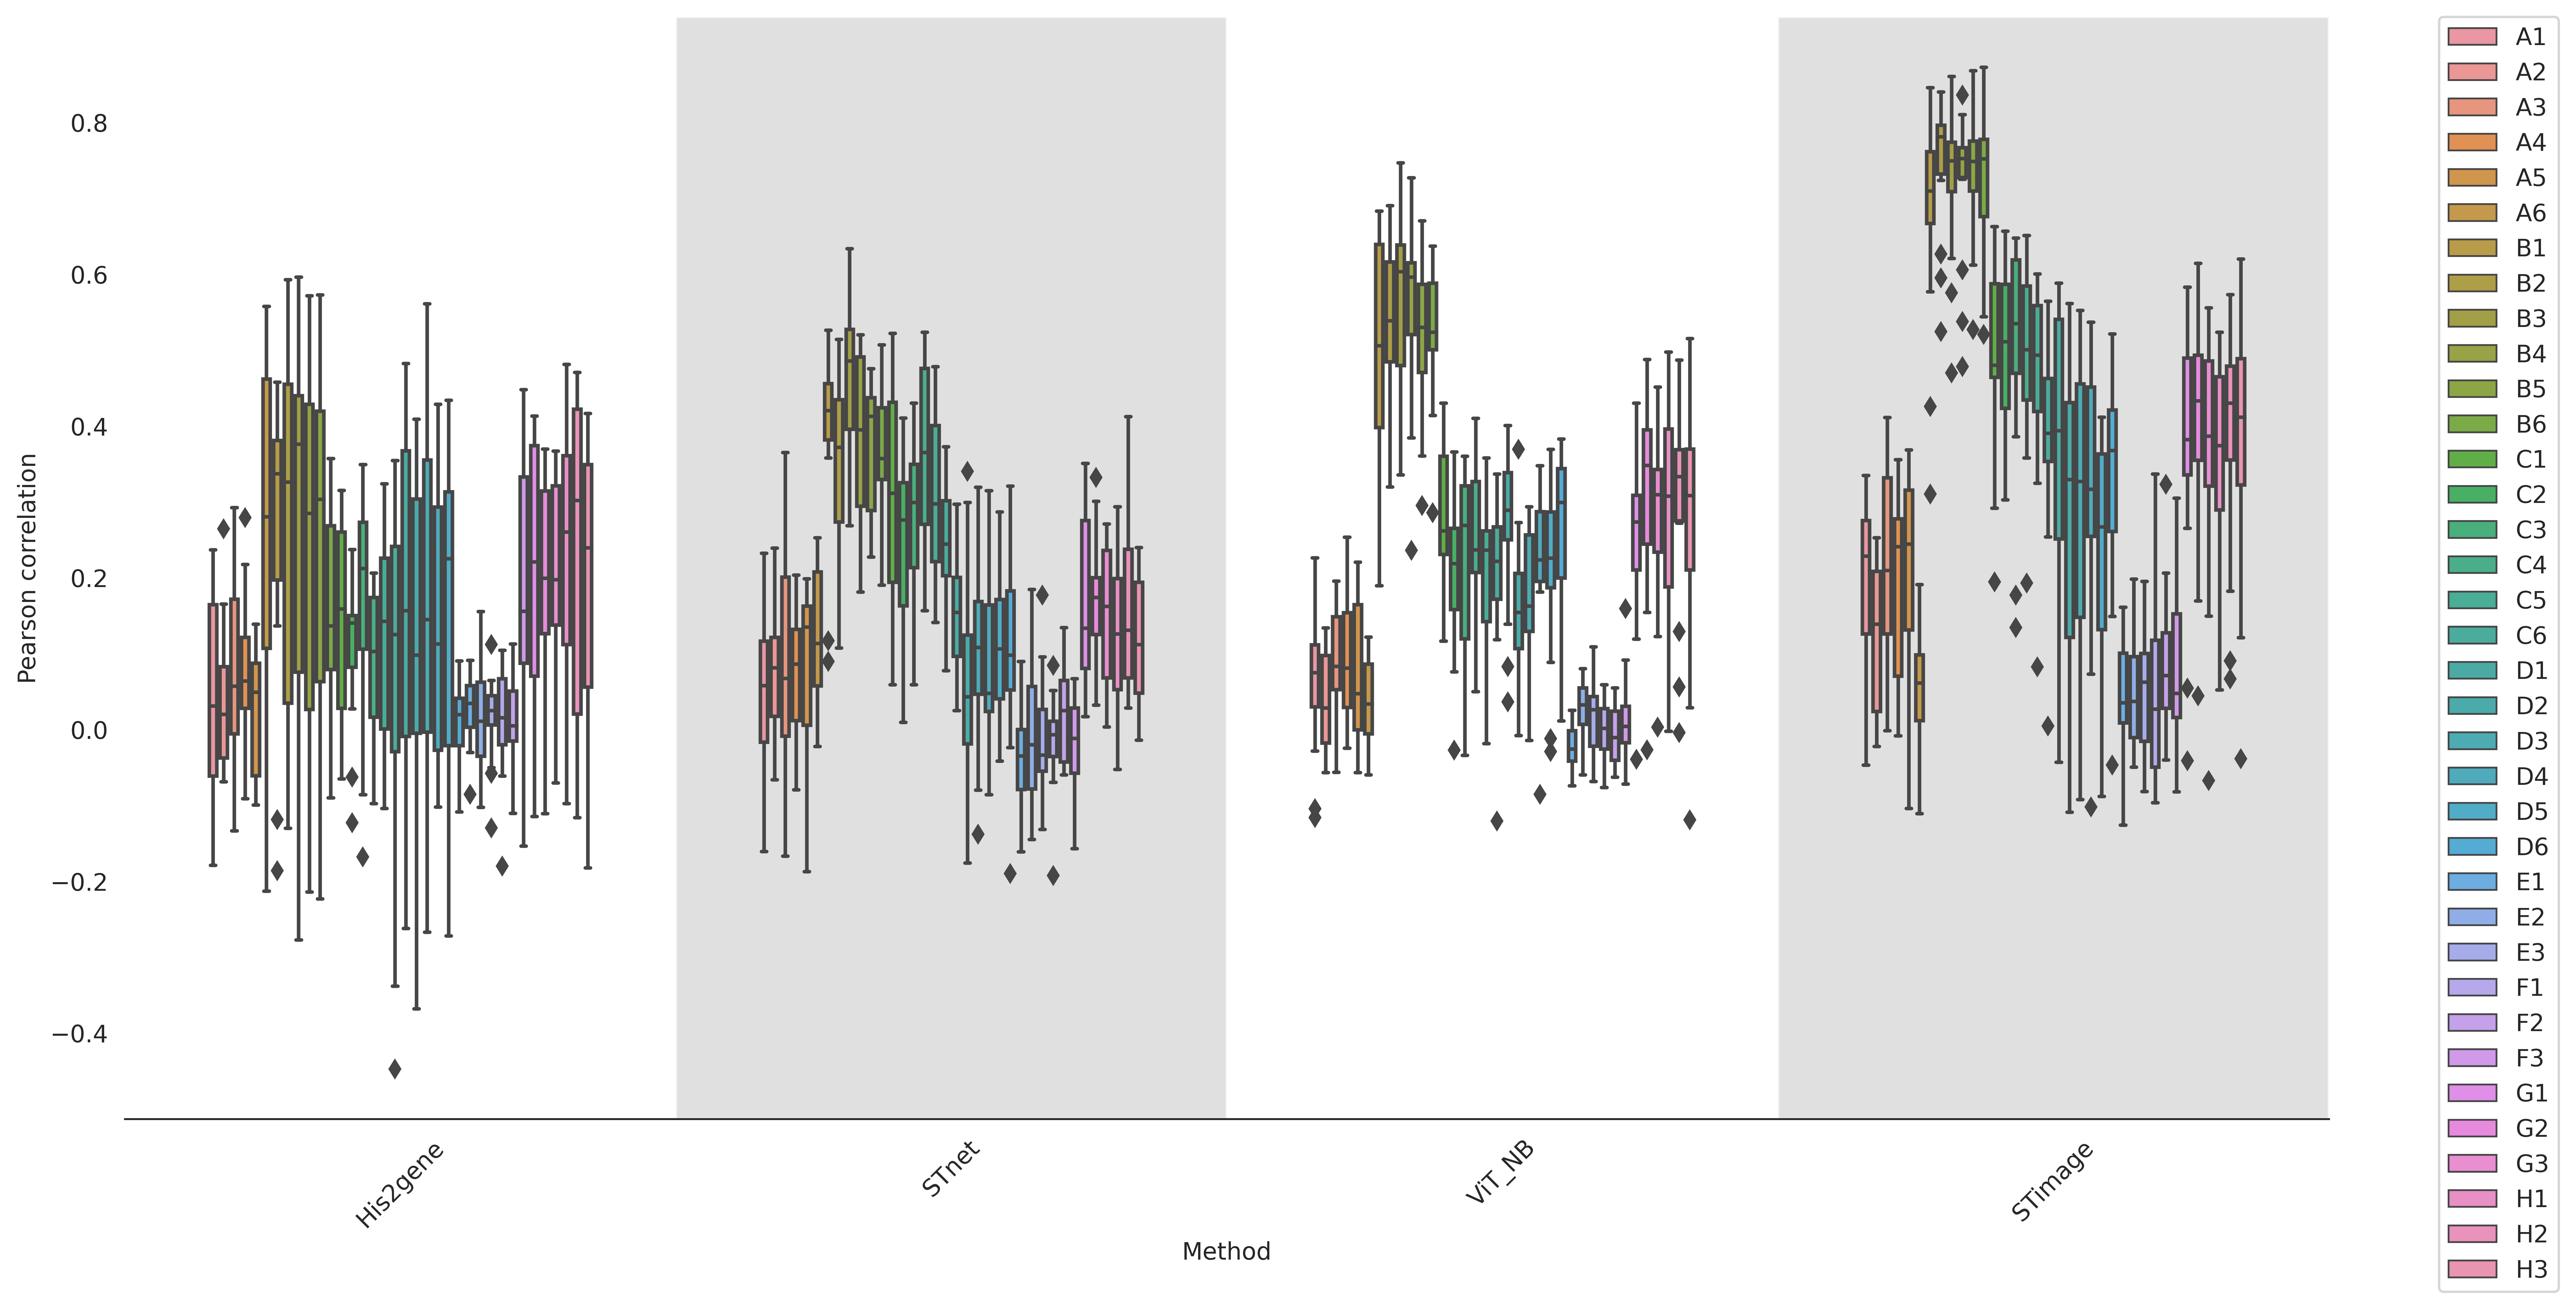

In [12]:
fig = plt.figure(figsize=(15, 8))
a = sns.boxplot(x="Method", y="Pearson correlation", hue="Slide",

               width=0.7,
               data=df)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
sns.despine(left=True)
a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
adjust_box_widths(fig, 0.7)
plt.autoscale()
gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./compare_STimage_her2gene_stnet_stnetData_byMethod.png", dpi=300)
plt.show()

<ipython-input-10-3d3a00831222>:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


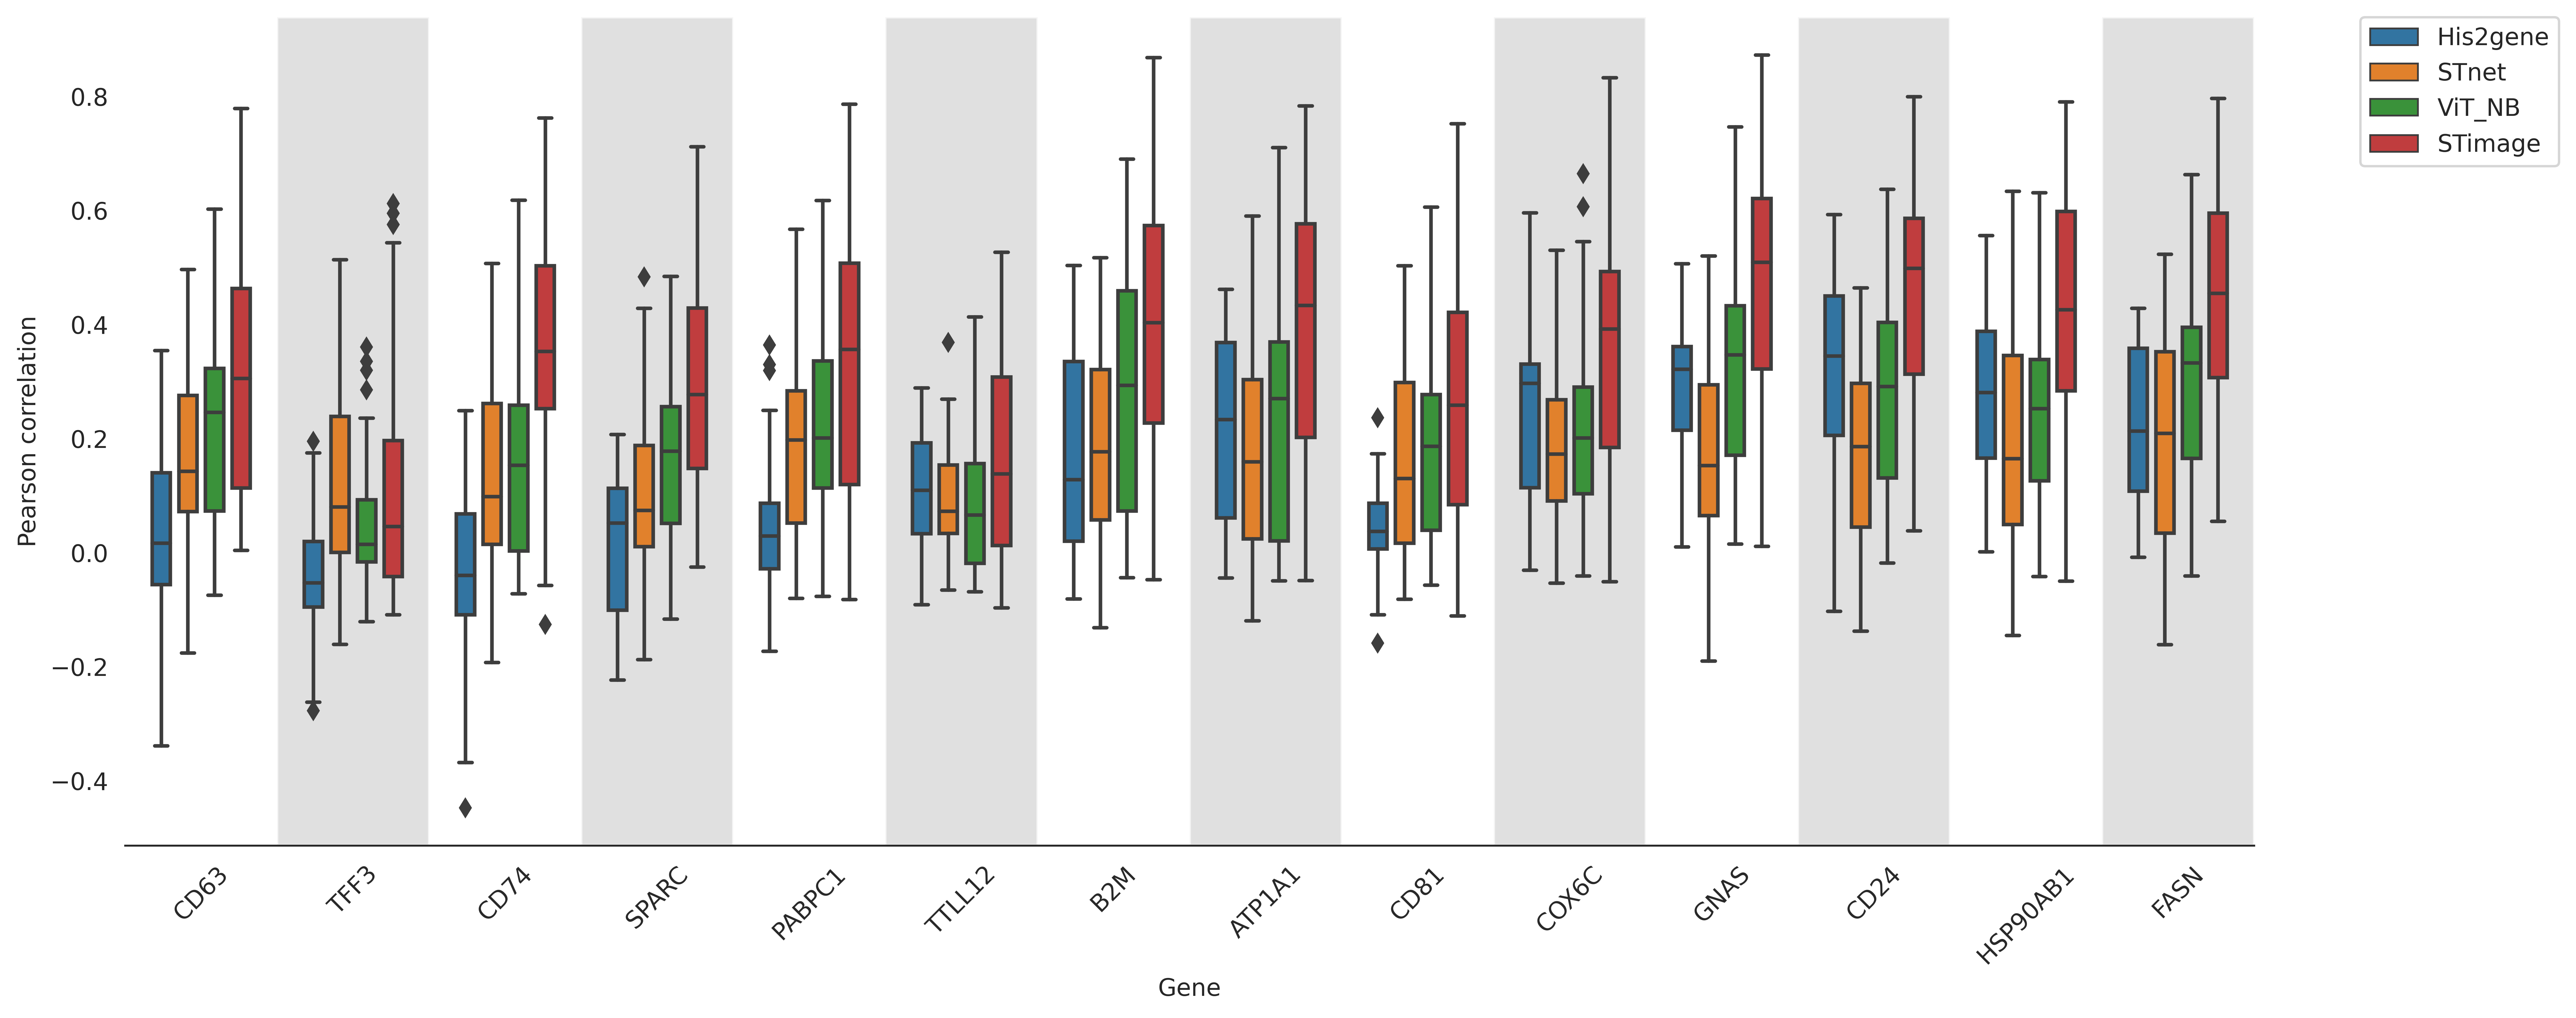

In [14]:
fig = plt.figure(figsize=(15, 6))
a = sns.boxplot(x="Gene", y="Pearson correlation", hue="Method",

               width=0.7,
               data=df)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
sns.despine(left=True)
a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
adjust_box_widths(fig, 0.7)
plt.autoscale()
gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./compare_STimage_her2gene_stnet_stnetData_byGene.png", dpi=300)
# plt.show()

In [15]:
BASE_PATH = Path("/clusterdata/uqxtan9/Xiao/STimage/development/stimage_compare_histogene_1000hvg")

In [16]:
df = pd.DataFrame()

In [17]:
for method in ["histogene", "stimage", "stnet", "ViT_NB"]:
    for f in BASE_PATH.glob("./{}*.csv".format(method)):
        df_ = pd.read_csv(f, index_col=0)
        df = df.append(df_, ignore_index=True)

In [18]:
df["Method"].unique()

array(['His2gene', 'STimage', 'STnet', 'ViT_NB'], dtype=object)

In [19]:
df["Method"] = df["Method"].replace("STimage_her2st", "STimage")

In [20]:
df = df.sort_values(["Slide", "Pearson correlation"])

<ipython-input-10-3d3a00831222>:36: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


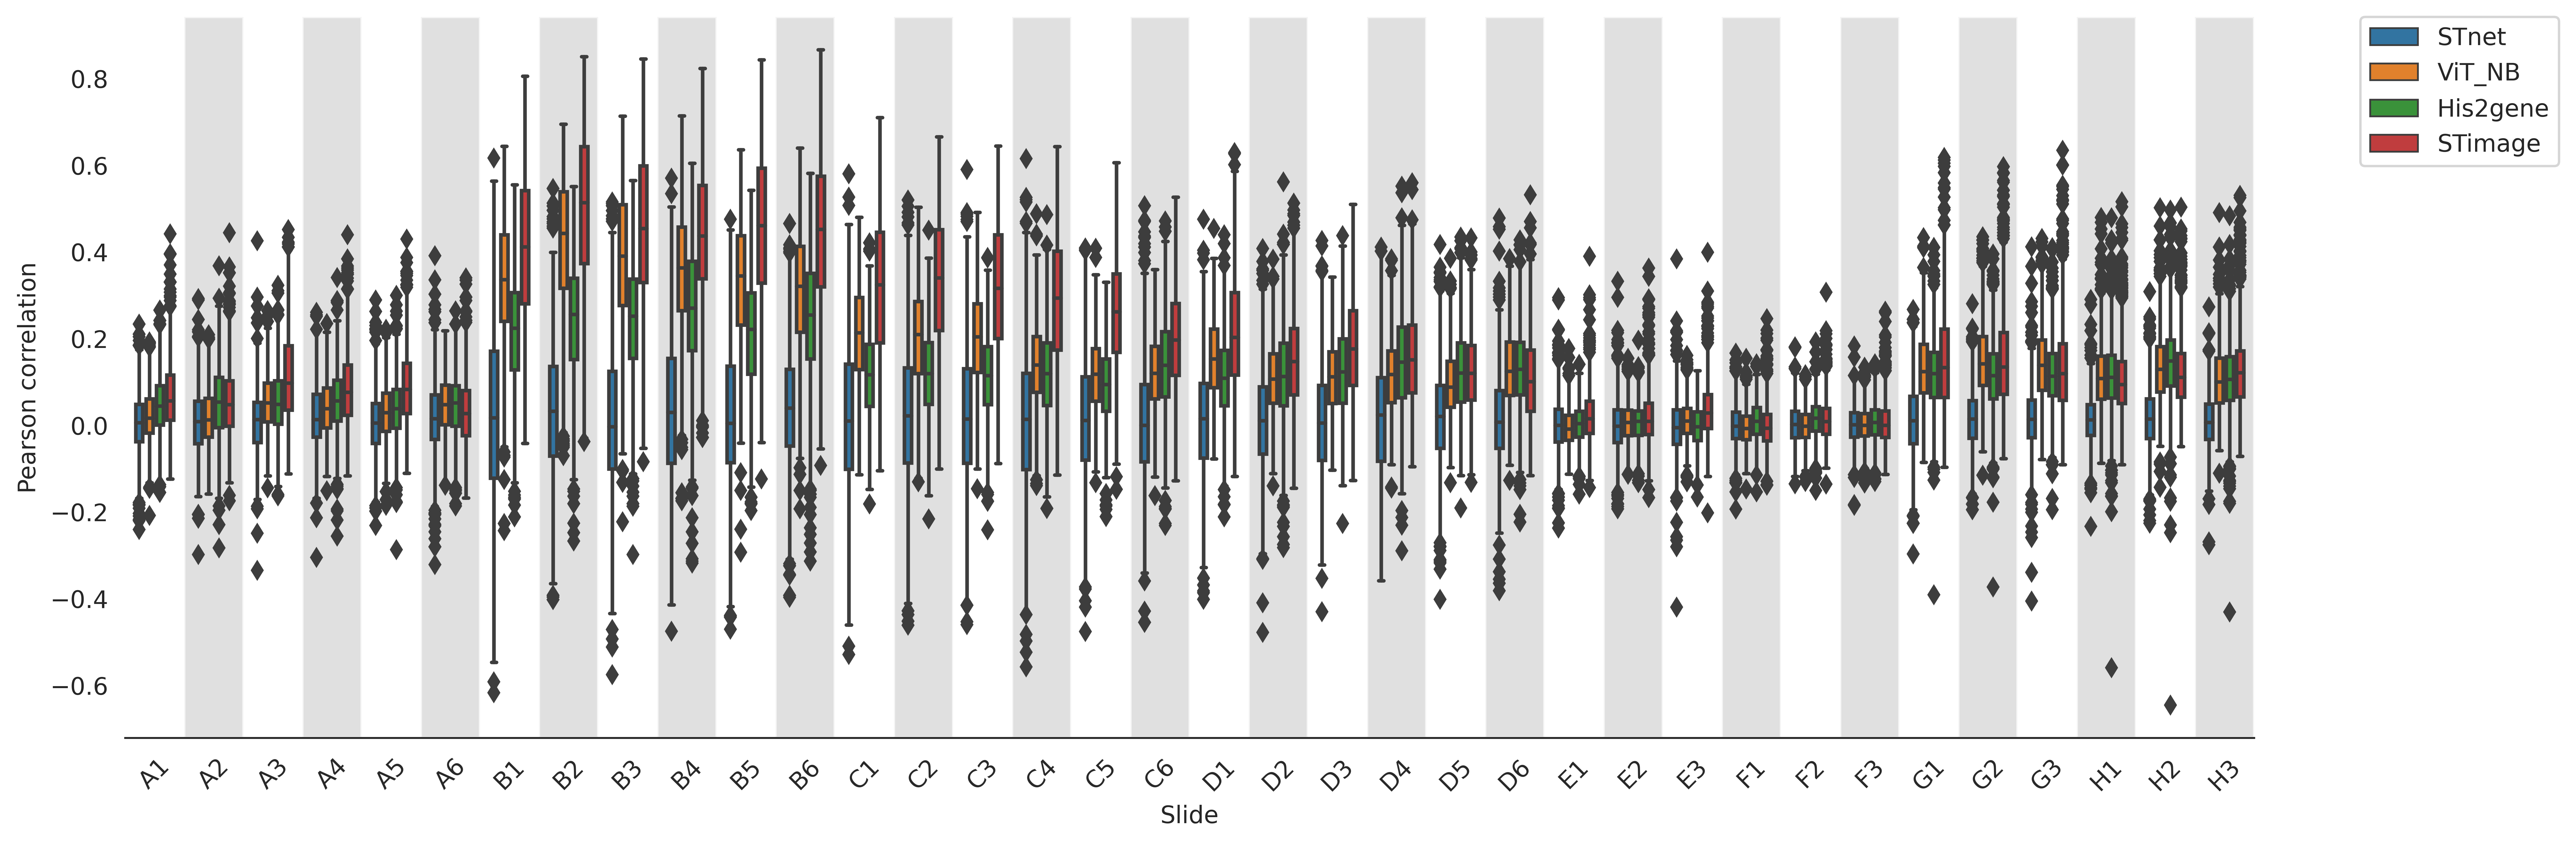

In [21]:
fig = plt.figure(figsize=(15, 5))
a = sns.boxplot(x="Slide", y="Pearson correlation", hue="Method",

               width=0.7,
               data=df)
a.set_xticklabels(a.get_xticklabels(), rotation=45)
sns.despine(left=True)
a.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
adjust_box_widths(fig, 0.7)
plt.autoscale()
gs = GridShader(a, facecolor="lightgrey", first=False, alpha=0.7)
plt.tight_layout()
plt.savefig("./compare_STimage_her2gene_stnet_stnetdata_bySample_1000hvg.png", dpi=300)
plt.show()